In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season'])
    df = df.astype(float)

    return df

def xgboost_grid_search():
    df = encoder(pd.read_csv('proba.csv'))

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Define the grid of hyperparameters to search
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [3, 4, 5, 6],
        'min_child_weight': [1, 2, 3, 4],
        'gamma': [0, 0.1, 0.2, 0.3],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    }

    model = xgb.XGBClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Best Model Parameters:", grid_search.best_params_)
    print("Test Set Accuracy:", test_accuracy)

def main():
    xgboost_grid_search()


In [ ]:
main()

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'VVM10'])
    df = df.astype(float)

    return df

def xgboost_model():
    df = encoder(pd.read_csv('proba.csv'))

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4
    , min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Assuming your model is named 'model' and is already trained
    xgb.plot_importance(model)
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    xgb.plot_importance(model)
    plt.show()
    

def main():
    xgboost_model()

Accuracy: 0.806697108066971


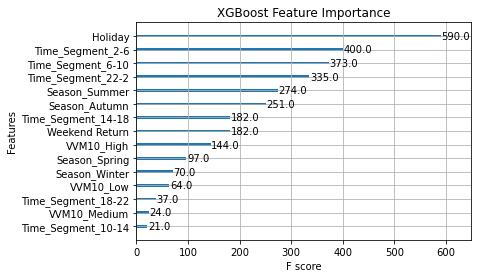

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       326
         1.0       0.77      0.88      0.82       331

    accuracy                           0.81       657
   macro avg       0.81      0.81      0.81       657
weighted avg       0.81      0.81      0.81       657

Confusion Matrix:
[[238  88]
 [ 39 292]]


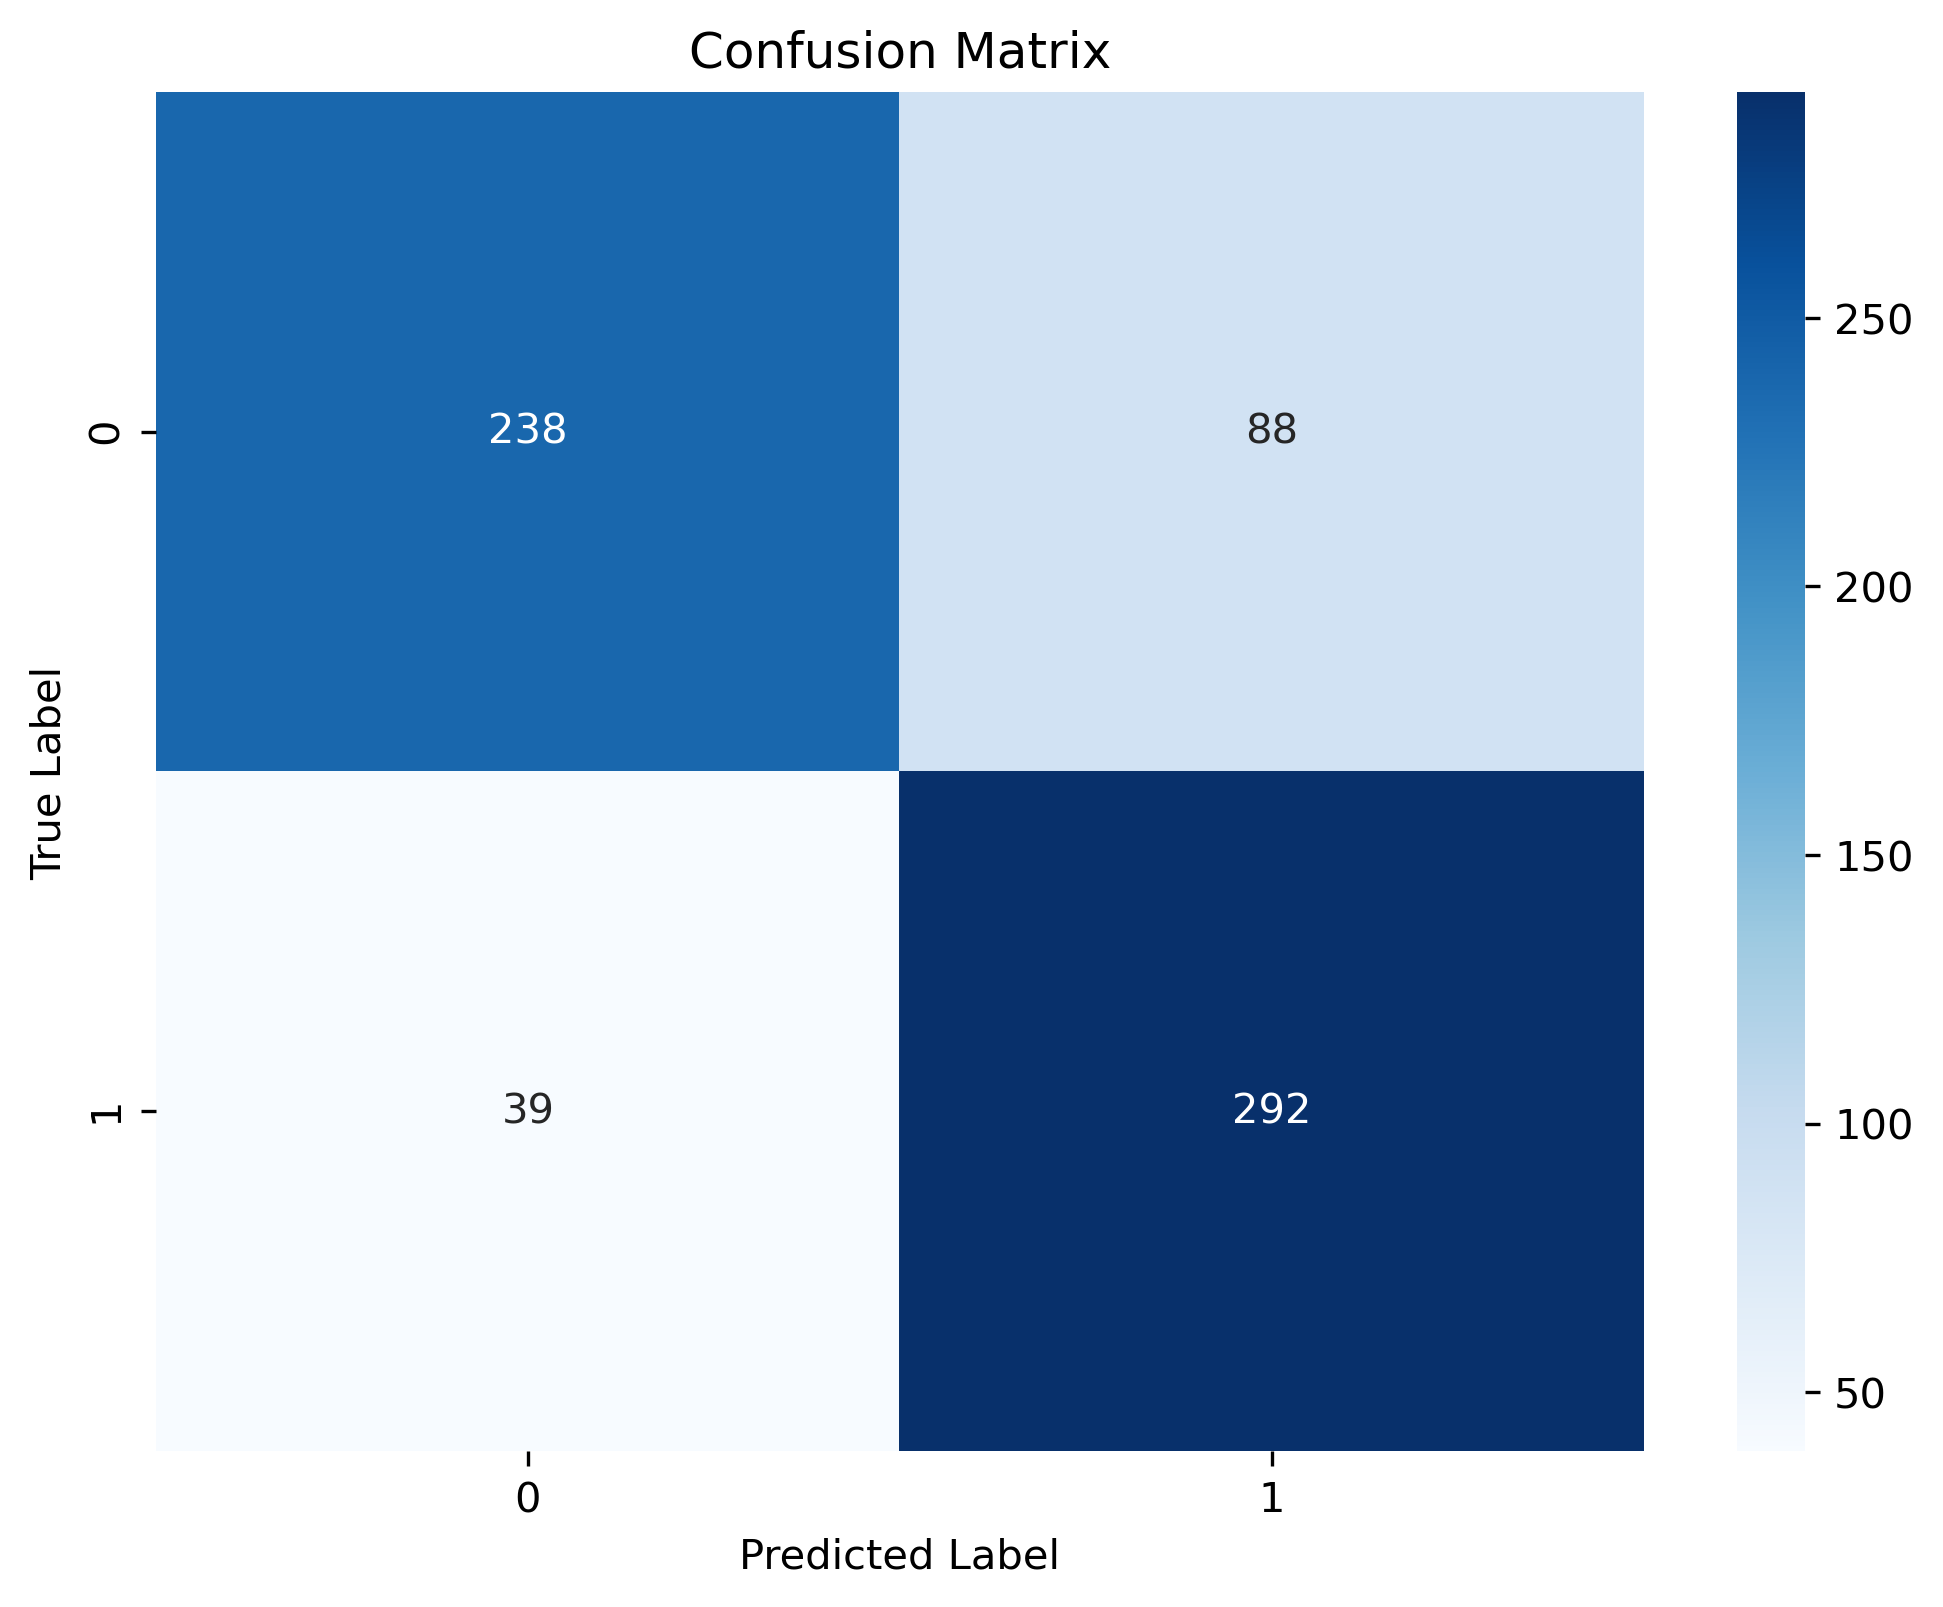

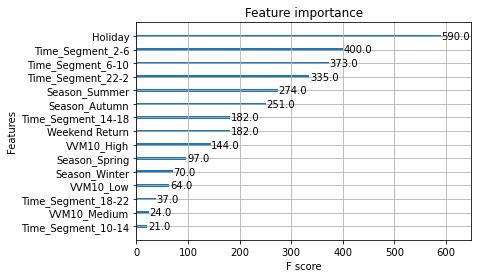

In [3]:
main()